Text(0,0.5,'Infected Individuals')

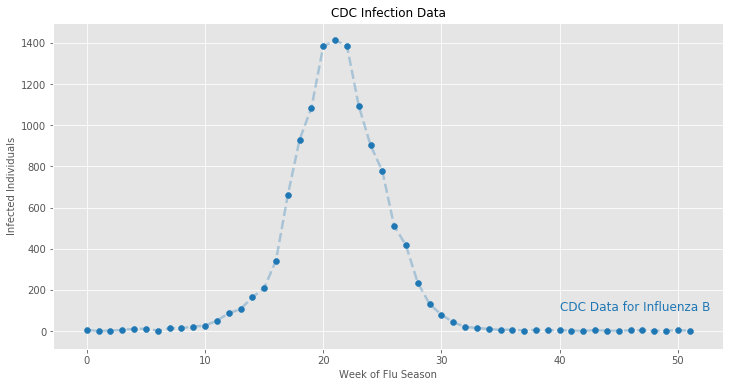

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

virus = 

def weekTransform(row):
    if (row["WEEK"] >= 40):
        week = row["WEEK"] - 40
    else:
        week = row["WEEK"] + 12
    return(week)

df = pd.read_csv('WHO_NREVSS_Combined_2007_2008.csv', header=1)

df["idx: t"] = df.apply(weekTransform, axis=1)

X = df['idx: t']
Y = df['B']

plt.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

plt.figure(figsize=(12,6))
plt.plot(X, Y, ls="--", lw=2.5, color=tableau20[0], alpha=0.3)
plt.scatter(X, Y, color=tableau20[0])
plt.text(40, 100, "CDC Data for Influenza B", fontsize=12, color=tableau20[0])
plt.title("CDC Infection Data", fontsize=12)
plt.xlabel("Week of Flu Season", fontsize=10)
plt.ylabel("Infected Individuals", fontsize=10)

In [28]:
N = 1000000
I0 = 1
R0 = 0
S0 = N - R0 - I0

gamma = 1/3
rho = 1.24
beta = rho*gamma

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

min = 0
max = 51
t = list(range(min*7, max*7))
w = [x/7 for x in t]

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

incidence_predicted = -np.diff(S[0:len(S)-1:7])
incidence_observed = fluData['B']
fraction_confirmed = incidence_observed.sum()/incidence_predicted.sum()